In [1]:
from gensim.models import Word2Vec
import pandas as pd
import numpy as np
from nltk.corpus import brown, movie_reviews, treebank
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [10]:
import gensim.downloader
gn_model = gensim.downloader.load( 'word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [28]:
categories=["romance","humor","fiction","science_fiction","religion","news"]

In [38]:
def generate_paragraph_embeddings(paragraph):
  sent_embeddings=[]
  for sent in paragraph:
    for word in sent:
      try:
        emb=gn_model.wv[word]
        sent_embeddings.append(emb)
      except KeyError:
        pass
  if len(sent_embeddings)==0:
    return [],[],False
  return np.mean(sent_embeddings,axis=0),np.std(sent_embeddings,axis=0),True

In [39]:
def generate_data(categories):
  data=[]
  labels=[]
  for idx,category in enumerate(categories):
      for p in brown.paras(categories=[category]):
        m,s,status=generate_paragraph_embeddings(p)
        if not status:
          continue
        data.append(np.concatenate((m,s)))
        labels.append(idx)
  return data,labels

In [40]:
data,labels=generate_data(categories)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix

In [57]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,stratify=labels,test_size=.2)
rf_clf=RandomForestClassifier(max_depth=11,n_estimators=1000,n_jobs=-1)
neigh_clf=KNeighborsClassifier(n_neighbors=7)
rf_clf.fit(X_train,y_train)
neigh_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [58]:
print("Random Forest Accuracy: ",accuracy_score(y_test,rf_clf.predict(X_test)))
print("7-Nearest Neighbhors Accuracy: ",accuracy_score(y_test,neigh_clf.predict(X_test)))

Random Forest Accuracy:  0.6390154968094804
7-Nearest Neighbhors Accuracy:  0.5752051048313582


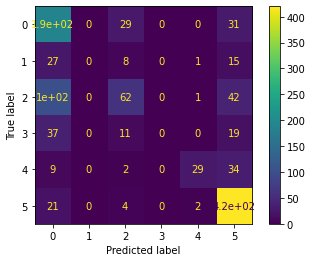

In [59]:
plot_confusion_matrix(rf_clf, X_test, y_test)  
plt.show()  